# Stochastic Simulation

*Winter Semester 2024/25*

20.12.2024

Prof. Sebastian Krumscheid<br>
Assistants: Stjepan Salatovic, Louise Kluge

<h3 align="center">
Exercise sheet 07
</h3>

---

<h1 align="center">
Variance Reduction Techniques (cont.)
</h1>

In [93]:
import matplotlib.pyplot as plt
import numpy as np

from typing import Tuple
from tqdm.notebook import tqdm
from scipy.stats import norm, multivariate_normal
from scipy.integrate import nquad

In [94]:
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

## Exercise 1

Suppose we are given a control variate $Y$ with known mean $\mathbb{E}(Y)$ and
consider the usual modified random variable
\begin{equation*}
  \tilde{Z}_\alpha = Z + \alpha\bigl(Y-\mathbb{E}(Y)\bigr)\;,
\end{equation*}
from which we aim at estimating $\mu=\mathbb{E}(Z)$. In fact, here we consider
the following _one-shot algorithm_ for estimating $\mu$:

---

**Algorithm 1** One-shot algorithm

- Generate $N$ i.i.d. replicas $\bigl(Z^{(i)},Y^{(i)}\bigr)$, $i=1,\dots, N$.
- Estimate ${\alpha}_{\text{opt}}$ by $\hat{\alpha}_{\text{opt}} := -\hat{\sigma}_{Z,Y}^2/\hat{\sigma}_{Y}^2$, using the usual unbiased mean, variance, and covariance estimators based on the sample ${\bigl(Z^{(i)},Y^{(i)}\bigr)}_{i=1,\dots,N}$.
- Compute the control variate estimator of $\mu$ as $$
    \hat\mu = \frac{1}{N}\sum_{i=1}^N \Bigl(Z^{(i)} + \hat{\alpha}_{\text{opt}}\bigl(Y^{(i)} - \mathbb{E}(Y)\bigr)\Bigr)\;.$$
---

1. Show that the estimator $\hat\mu$ is asymptotically normally
  distributed, in the sense that
  \begin{equation*}
    \sqrt{N}\frac{ \hat\mu - \mu}{\sigma_{\text{opt}}} \underset{N\to\infty}{\Rightarrow} \mathcal{N}(0,1)\;,\quad\text{where}\quad \sigma_{\text{opt}} = \sqrt{\text{Var}(\tilde{Z}_{\alpha_\text{opt}})}\;.
  \end{equation*}
  Furthermore, explain why the asymptotic normality also holds when
  $\sigma_{\text{opt}}$ is replaced by the usual empirical standard
  deviation based on a sample of realizations of
  $\tilde{Z}_{\alpha_\text{opt}}$.

      **Hint:** Consider re-writing the estimator as the summation of the control variate estimator computed with the exact $\alpha_{\text{opt}}$ and a correction term involving $\hat{\alpha}_{\text{opt}}-\alpha_{\text{opt}}$ as follows:
      \begin{align*}
     \hat\mu &= \frac{1}{N}\sum_{i=1}^N \Bigl(Z^{(i)} + \alpha_{\text{opt}}\bigl(Y^{(i)} - \mathbb{E}(Y)\bigr)\Bigr) + (\hat{\alpha}_{\text{opt}}-\alpha_{\text{opt}})\Bigl( \frac{1}{N}\sum_{i=1}^N Y^{(i)} -  \mathbb{E}(Y) \Bigr).
    \end{align*}  
      Then, recall Slutsky's theorem, which states
        that if $\xi_n$ converges in distribution to $\xi$ and $\eta_n$
        converges in probability to a constant $c$, then
        $$f(\xi_n,\eta_n) \underset{n\to\infty}{\Rightarrow} f(\xi,c)$$ for
        any continuous function $f\colon\mathbb{R}\times\mathbb{R}\to \mathbb{R}$. Here, the
        symbol $\Rightarrow$ denotes convergence in distribution.

Because
  $\hat{\alpha}_{\text{opt}}\equiv \hat{\alpha}_{\text{opt}}(N)$
  depends on the samples
  ${\bigl(Z^{(i)}, Y^{(i)}\bigr)}_{i=1,\dots, N}$, the control variate
  estimator $\hat\mu$ is not unbiased (notice that it is unbiased for
  any $\alpha$ deterministic though!), but only asymptotically
  unbiased. Consequently, the CLT (i.e. the asymptotic normality) for
  $\hat\mu$ is not immediate, although not very difficult either. In
  fact, first note that $\hat\mu$ can be written as
  \begin{equation*}
    \begin{aligned}
      \hat\mu &= \frac{1}{N}\sum_{i=1}^N \Bigl(Z^{(i)} + \alpha_{\text{opt}}\bigl(Y^{(i)} - \mathbb{E}(Y)\bigr)\Bigr) + (\hat{\alpha}_{\text{opt}}-\alpha_{\text{opt}})\Bigl( \frac{1}{N}\sum_{i=1}^NY^{(i)} -  \mathbb{E}(Y) \Bigr)\\
      &=E_N\bigl(\tilde{Z}_{\alpha_{\text{opt}}}\bigr) +
      (\hat{\alpha}_{\text{opt}}-\alpha_{\text{opt}})\Bigl(E_N(Y) -
      \mathbb{E}(Y) \Bigr)\;,
    \end{aligned}
  \end{equation*}
  where $E_N(\xi) := \frac{1}{N}\sum_{i=1}^N\xi^{(i)}$ denotes the
  sample average of $\xi$. Since
  $\mathbb{E}\bigl(\tilde{Z}_{\alpha}\bigr) = \mu$ for any deterministic
  $\alpha$, we find that
  \begin{equation*}
    \begin{aligned}
    \sqrt{N}\,\frac{\hat\mu - \mu}{\sigma_{\text{opt}}} &= \sqrt{N}\,\frac{E_N\bigl(\tilde{Z}_{\alpha_{\text{opt}}}\bigr) - \mathbb{E}\bigl(\tilde{Z}_{\alpha_{\text{opt}}}\bigr)}{\sqrt{\text{Var}(\tilde{Z}_{\alpha_\text{opt}})}}
    + \sqrt{N}\,\frac{E_N(Y) -  \mathbb{E}(Y) }{\sqrt{\text{Var}(Y)}}\,\sqrt{\frac{\text{Var}(Y)}{\text{Var}(\tilde{Z}_{\alpha_\text{opt}})}}(\hat{\alpha}_{\text{opt}}-\alpha_{\text{opt}})\\
    &= \xi_N + C\,\zeta_N\eta_N \;,
  \end{aligned}
\end{equation*}
for $C = \sqrt{\text{Var}(Y)/\text{Var}(\tilde{Z}_{\alpha_\text{opt}})}$ and 
\begin{equation*}
  \xi_N := \sqrt{N}\,\frac{E_N\bigl(\tilde{Z}_{\alpha_{\text{opt}}}\bigr) - \mathbb{E}\bigl(\tilde{Z}_{\alpha_{\text{opt}}}\bigr)}{\sqrt{\text{Var}(\tilde{Z}_{\alpha_\text{opt}})}}\;,\quad
  \eta_N := \sqrt{N}\,\frac{E_N(Y) -  \mathbb{E}(Y) }{\sqrt{\text{Var}(Y)}}\;,\quad \zeta_N := \hat{\alpha}_{\text{opt}}(N)-\alpha_{\text{opt}}\;.
\end{equation*}
The individual limits for these three random variables are
\begin{equation*}
\xi_N\Rightarrow \mathcal{N}(0,1)\;,\quad \eta_N\Rightarrow \mathcal{N}(0,1)\;,\quad\zeta_N\to 0\;\text{in prob.}
\end{equation*}
It follows from Slutsky's theorem that $\zeta_N\eta_N \Rightarrow
0$. Since the product converges to a constant, it follows that
$\zeta_N\eta_N \to 0$ in probability. The CLT for $\hat\mu$ then
follows in view of using Slutsky's theorem again.

2. Implement the one-shot algorithm described above. Apply it to
  the examples considered in Lab 06, Exercise 1. That is, approximate
  the probability $p = \mathbb{P}(\boldsymbol{X}\in A)$ for the sets
  $A=\bigl\{\boldsymbol{x}=(x_1,x_2)\in\mathbb{R}^2\colon x_i\ge
  a,\,i=1,2\bigr\}$ with $a=1,3,10$. Here,
  $\boldsymbol{X}\sim\mathcal{N}(\boldsymbol{0},\Sigma)$ with
  $\Sigma=\bigl(\begin{smallmatrix} 4 & -1\\ -1 &
    4 \end{smallmatrix}\bigr).$
    1. First, explain why $Y = \mathbb{I}_{\{X_1+X_2\ge 2a\}}$ for
    $\boldsymbol{X} = (X_1,X_2)$ could be a decent control variate for
    this problem.
    2. Then perform simulations and investigate the variance
    reduction effect for the control variate $Y$. Moreover, use the
    result proved in point 1 to compute asymptotic $95\%$ confidence
    intervals.
    3. Can you think of other appropriate control variates?

Implementation is identical to a Monte Carlo method for the
  random variable $\tilde{Z}_{\alpha_{\text{opt}}}$, once
  $\hat{\alpha}_{\text{opt}}$ has been estimated.
    
A. The control variate $Y = \mathbb{I}_{\{X_1+X_2\ge 2a\}}$ is
motivated by the observation that
$\min(X_1,X_2)\le \frac{X_1+X_2}{2}$ and the fact that the
distribution of the random variable $\xi = X_1+X_2$ is known so
that $\mathbb{E}(Y)$ is also given. In fact, $\xi = B\boldsymbol{X}$ for
$B=(1,1)$, so that
$\xi\sim \mathcal{N}(0,B\Sigma B^T) = \mathcal{N}(0,6)$. It
follows that $\mathbb{E}(Y) = 1- \Phi(2a/\sqrt{6})$, where $\Phi$ is the
CDF of the $\mathcal{N}(0,1)$ distribution.

In [95]:
def crude_Monte_Carlo(N: int, a: float, fix_seed: bool=False) -> Tuple[float, float]:
    """
    Estimates the probability of both components of a random variable X being greater
    than or equal to `a`, using a crude Monte Carlo simulation.
    Returns estimates for mean as well as variance.
    """
    if fix_seed:
        np.random.seed(999)
    x = phi.rvs(size=N)
    psi = lambda x, a: (x[:, 0] >= a) * (x[:, 1] >= a)
    z = psi(x, a)
    mc_mean = np.mean(z)
    mc_var = np.var(z, ddof=1)

    return mc_mean, mc_var

In [96]:
def importance_sampling(N: int, a: float, delta: float=1.0, fix_seed: bool=False) -> Tuple[float, float]:
    """
    Estimates the probability of both components of a random variable X being greater
    than or equal to `a`, using importance sampling with a Gaussian distribution.
    Returns estimates for mean as well as variance.
    """
    if fix_seed:
        np.random.seed(999)
    x_star = np.array([a, a])
    g = multivariate_normal(mean=x_star, cov=delta * sigma)
    x = g.rvs(size=N)
    psi = lambda x, a: (x[:, 0] >= a) * (x[:, 1] >= a)
    z = psi(x, a) * phi.pdf(x) / g.pdf(x)
    mc_mean = np.mean(z)
    mc_var = np.var(z, ddof=1)

    return mc_mean, mc_var

In [137]:
def control_variate(N: int, a: float, fix_seed: bool=False) -> Tuple[float, float]:
    """
    Estimates the probability of both components of a random variable X being greater
    than or equal to `a`, using a one-shot control variate algorithm.
    Returns estimates for mean as well as variance.
    """
    if fix_seed:
        np.random.seed(999)
    x = phi.rvs(size=N)
    psi = lambda x, a: (x[:, 0] >= a) * (x[:, 1] >= a)
    psi_cv = lambda x, a: x[:, 0] + x[:, 1] >= 2 * a
    z = psi(x, a)
    y = psi_cv(x, a)
    exp_y = 1 - norm().cdf(2 * a / np.sqrt(6))

    cov_zy = 1 / (N - 1) * np.sum((z - np.mean(z)) * (y - exp_y))
    cov_yy = np.var(y, ddof=1)
    opt_alpha = -cov_zy / cov_yy

    z_alpha = z + opt_alpha * (y - exp_y)
    z = psi(x, a)
    cv_mean = np.mean(z_alpha)
    cv_var = np.var(z_alpha, ddof=1)

    return cv_mean, cv_var

In [138]:
sigma = np.array([
    [4, -1],
    [-1, 4],
])
phi = multivariate_normal(cov=sigma)

In [139]:
a_vals = [1, 3]
true_p = [
    nquad(
        lambda x, y: phi.pdf([x, y]),
        ranges=[(a, np.inf), (a, np.inf)])[0]
    for a in a_vals
]

In [140]:
alpha = 0.05
cval = norm().ppf(1 - alpha / 2)

N = 100_000

print(f"Crude Monte Carlo with N = {N} samples\n" + "-" * 41)
for a in a_vals:
    p = true_p[a_vals.index(a)]
    mean, var = crude_Monte_Carlo(N, a)
    ci = cval * np.sqrt(var / N)
    rmse = np.sqrt((mean - p) ** 2 + var / N) / p
    print(f"a = {a:<2} | p = {mean:.5f} ± {ci:.3e} | rel. RMSE = {rmse:.3e}")

print(f"\nImportance sampling with N = {N} samples\n" + "-" * 41)
for a in a_vals:
    p = true_p[a_vals.index(a)]
    mean, var = importance_sampling(N, a)
    ci = cval * np.sqrt(var / N)
    rmse = np.sqrt((mean - p) ** 2 + var / N) / p
    print(f"a = {a:<2} | p = {mean:.5f} ± {ci:.3e} | rel. RMSE = {rmse:.3e}")

print(f"\nControl variate with N = {N} samples\n" + "-" * 43)
for a in a_vals:
    p = true_p[a_vals.index(a)]
    mean, var = control_variate(N, a)
    ci = cval * np.sqrt(var / N)
    rmse = np.sqrt((mean - p) ** 2 + var / N) / p
    print(f"a = {a:<2} | p = {mean:.5f} ± {ci:.3e} | rel. RMSE = {rmse:.3e}")

Crude Monte Carlo with N = 100000 samples
-----------------------------------------
a = 1  | p = 0.06529 ± 1.531e-03 | rel. RMSE = 1.265e-02
a = 3  | p = 0.00144 ± 2.350e-04 | rel. RMSE = 9.711e-02

Importance sampling with N = 100000 samples
-----------------------------------------
a = 1  | p = 0.06437 ± 8.702e-04 | rel. RMSE = 1.224e-02
a = 3  | p = 0.00137 ± 2.796e-05 | rel. RMSE = 1.208e-02

Control variate with N = 100000 samples
-------------------------------------------
a = 1  | p = 0.06545 ± 1.300e-03 | rel. RMSE = 1.203e-02
a = 3  | p = 0.00137 ± 2.101e-04 | rel. RMSE = 7.842e-02


In [141]:
a_vals = np.linspace(1, 3, 100)

N = 100_000

var_red_is = np.zeros(len(a_vals))
var_red_cv = np.zeros(len(a_vals))
for i, a in tqdm(enumerate(a_vals)):
    _, cmc_var = crude_Monte_Carlo(N, a, fix_seed=True)
    _, is_var = importance_sampling(N, a, fix_seed=True)
    _, cv_var = control_variate(N, a, fix_seed=True)

    var_red_is[i] = cmc_var / is_var
    var_red_cv[i] = cmc_var / cv_var

0it [00:00, ?it/s]

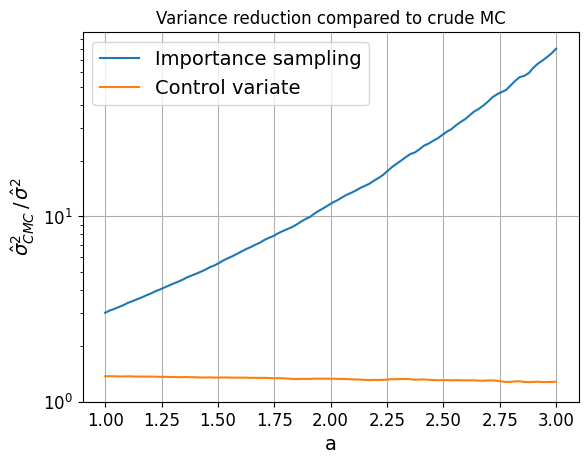

In [142]:
plt.semilogy(a_vals, var_red_is, label="Importance sampling")
plt.semilogy(a_vals, var_red_cv, label="Control variate")
plt.grid()
plt.yticks([1, 10])
plt.xlabel(r"a")
plt.ylabel("$\hat{\sigma}^2_{CMC} \,/\, \hat{\sigma}^2$")
plt.title("Variance reduction compared to crude MC")
plt.legend();

B. We concentrate on the values of $a \in [1, 3]$, since, for much larger values of $a$, there are almost no samples falling in the region of $A$, which results in issues computing $\hat{\alpha}_{opt}$. Hence, importance sampling is much more effective for larger values of $a$ for this problem, which can be observed in the Figure above. Still, for the one-shot algorithm with control variates, we observe a strict variance reduction compared to crude Monte Carlo (i.e. $\hat{\sigma}^2_{CMC} \,/\, \hat{\sigma}_{CV}^2 > 1$), that decreases with $a$. Note the exponentially increasing variance reduction achieved with importance sampling.

C. Another simple control variate could, for example, be $Y_j = \mathbb{I}_{\{X_j\ge a\}}$. Of course, this one does not perform as well as $Y$.

## Exercise 2

Suppose that we wish to compute
$\mu =
\mathbb{E}\bigl[\Psi_\tau(X_0,\dots,X_\tau)\mathbb{I}_{\{\tau<\infty\}}\bigr]$,
where $\tau$ is a stopping time adapted to the discrete time, discrete
state Markov chain $\{X_n\in\mathbb{Z}^d\colon n\in\mathbb{N}_0\}$ with
initial probability distribution $p_0$ (i.e. $X_0\sim p_0$) and with
Markov transition probabilities $p_{i,j}\in [0,1]$ such
that
\begin{equation*}
p_{i,j} = \mathbb{P}(X_{n+1} = j \vert X_n=i) \quad \forall\,i,j\in\mathbb{Z}^d\;.
\end{equation*}
Instead of relying on the evolution of this Markov chain, it is
natural to try to use importance measures that preserve the Markov
property (so as to guarantee that the paths can be simulated
efficiently under the importance measure). That is, one replaces the
transition probabilities $p_{i,j}$ by other Markov transition
probabilities $q_{i,j}\in [0,1]$, which dominate $p_{i,j}$ (i.e.
$q_{i,j} = 0 \Rightarrow p_{i,j}=0$); analogously for the initial
distribution. Moreover, we require that the stopping time $\tau$ is
almost surely finite for the Markov process with transition
probabilities $q_{i,j}$, which appears natural from a practical point
of view.

1. Prove that
$\mu =
\mathbb{E}\bigl[\Psi_\tau(X_0,\dots,X_\tau)\mathbb{I}_{\tau<\infty}\bigr]$
can be written as:
\begin{equation*}
\mu = \mathbb{E}_q \bigl[\Psi_\tau(X_0,\dots,X_\tau)w(X_0,\dots,X_\tau)\bigr]\;,\quad\text{with}\quad
w(X_0,\dots,X_m) = \frac{p_0(X_0)}{q_0(X_0)}\prod_{j=1}^m \frac{p_{X_{j-1},X_j}}{q_{X_{j-1},X_j}}\;.
\end{equation*}

The claim follows from the Markov property and properties of
	conditional expectations. Indeed, let $\mathbb{E}_p$ denote the expectation
	with respect to the transition probabilities $p_{i,j}$ and $\mathbb{E}_{p,X_{0:k}}$ the expectation with respect to the density corresponding to the first $k$ steps of the process. Then
	\begin{equation*}
	\begin{aligned}
	\mu &= \mathbb{E}_p\bigl[\Psi_\tau(X_0,\dots,X_\tau)\mathbb{I}_{\tau<\infty}\bigr]
	= \sum_{m=0}^\infty\mathbb{E}_p\bigl[\Psi_m(X_0,\dots,X_m)\mathbb{I}_{\tau=m}\bigr]\\
	&=\sum_{m=0}^\infty\mathbb{E}_{p,X_{0:m-1}}\Bigl[\mathbb{E}_p\bigl[\Psi_m(X_0,\dots,X_m)\mathbb{I}_{\tau=m}\bigl\vert\bigr.X_0,\dots, X_{m-1}\bigr] \Bigr]\\
	& =\sum_{m=0}^\infty\mathbb{E}_{p,X_{0:m-1}}\Bigl[\mathbb{E}_q\bigl[\Psi_m(X_0,\dots,X_m)\mathbb{I}_{\tau=m}\frac{p_{X_{m-1},X_m}}{q_{X_{m-1},X_m}}\bigl\vert\bigr.X_0,\dots, X_{m-1}\bigr] \Bigr]\\
	& = \dots
	= \sum_{m=0}^\infty\mathbb{E}_q\bigl[\Psi_m(X_0,\dots,X_m)\mathbb{I}_{\tau=m}\prod_{j=1}^m\frac{p_{X_{j-1},X_j}}{q_{X_{j-1},X_j}}\frac{p(X_0)}{q(X_0)}\bigr]\\
	& = \mathbb{E}_q\bigl[\Psi_\tau(X_0,\dots,X_\tau)\prod_{j=1}^\tau\frac{p_{X_{j-1},X_j}}{q_{X_{j-1},X_j}}\frac{p(X_0)}{q(X_0)}\bigr]\;,
	\end{aligned}
	\end{equation*}
	where the last equality is due to the assumption that $\tau$ is
	almost surely finite under the importance sampling distribution
	(denoted by $q$).

2. Implement the importance sampling algorithm for discrete time
Markov processes to the random walk
$\{X_n\in\mathbb{Z}\colon X_0=0, n\in\mathbb{N}\}$ with transition
probabilities:
\begin{equation*}
p_{i,i+1} \equiv\mathbb{P}(X_{n+1}=i+1\vert X_{n}=i) = \frac{1}{2} = \mathbb{P}(X_{n+1}=i-1\vert X_{n}=i) \equiv  p_{i,i-1}\;,\quad n\ge 0,\,i\in\mathbb{Z}\;.
\end{equation*}
Consider the stopping time $\tau_K := \inf\{n\colon X_n = K\}$ for a
given constant $K=4$ and apply the algorithm to estimate
$\mathbb{P}\bigl(\tau_K<T\bigr)$ with $T=10$. For the importance sampling, consider the random walk with
transition probabilities
\begin{equation*}
q_{i,i+1} \equiv\mathbb{P}(X_{n+1}=i+1\vert X_{n}=i) = \alpha > 1-\alpha=\mathbb{P}(X_{n+1}=i-1\vert X_{n}=i) \equiv  q_{i,i-1}\;.
\end{equation*}
Experiment with different
values for $\alpha$.

For this example the weight function simplifies to
\begin{equation*}
w(X_0,\dots, X_m) = \frac{1}{{(2\alpha)}^{n_\text{up}}} \frac{1}{{\bigl(2(1-\alpha)\bigr)}^{n_\text{down}}}\;,\quad
m = n_\text{up} + n_\text{down}\;,
\end{equation*}
where $n_\text{up} = \sum_{j=1}^m\mathbb{I}(X_j-X_{j-1} = 1)$ is the
number of increments in the process.

When applying the importance sampling method, we observe a
variance reduction (i.e. efficiency improvement) compared to the
crude MC method, which results in narrower confidence intervals. When
repeating the experiment for different values of the transition
probability $\alpha$, the Figure down below indicates an optimal
value of around $\alpha \approx 0.807$.

In [143]:
def estimate_prob(N: int, a: float, K: int, T: int, importance_sampling: bool=False, fix_seed: bool=False) -> Tuple[float, float]:
    """
    Estimates the probability of a random walk reaching `K` within a given
    number of steps `T` based on `N` Monte Carlo samples.
    Returns the mean as well as the variance of the estimator.
    """
    if fix_seed:
        np.random.seed(999)

    u = np.random.rand(N, T - 1)
    incr = (2 * (u < a) - 1)
    x = incr.cumsum(axis=1)

    if importance_sampling:
        stop_times = np.argmax(x == K, axis=1)
        stop_times[stop_times == 0] = (T - 1) - 1
        mask = np.arange(T - 1) <= stop_times[:, np.newaxis]
        n_up = ((incr == 1) * mask).sum(axis=1)
        n_down = ((incr == -1) * mask).sum(axis=1)
        weight = 1 / 2 ** (stop_times + 1) / a ** n_up / (1 - a) ** n_down
    else:
        weight = 1

    z = np.any(x == K, axis=1) * weight

    return np.mean(z), np.var(z, ddof=1)

In [144]:
N = 100_000
K = 4
T = 10

In [145]:
a = 0.5
mean_cmc, var_cmc = estimate_prob(N, a, K, T, importance_sampling=False)

a = 0.81
mean_is, var_is = estimate_prob(N, a, K, T, importance_sampling=True)

print(f"N = {N} Samples\n" + "-" * 30)
print(f"Crude Monte Carlo {'':<3}| Mean: {mean_cmc:.3f}, Variance: {var_cmc:.3f}")
print(f"Importance sampling | Mean: {mean_is:.3f}, Variance: {var_is:.3f}")

N = 100000 Samples
------------------------------
Crude Monte Carlo    | Mean: 0.181, Variance: 0.148
Importance sampling | Mean: 0.180, Variance: 0.013


In [146]:
a = 0.5
_, var_cmc = estimate_prob(N, a, K, T, importance_sampling=False, fix_seed=True)

a_vals = np.linspace(0.5, 0.99, 100)
var_ratios = np.zeros(len(a_vals))

varmc = np.zeros(len(a_vals))
varis = np.zeros(len(a_vals))
for i, a in tqdm(enumerate(a_vals)):
    _, var_is = estimate_prob(N, a, K, T, importance_sampling=True, fix_seed=True)
    var_ratios[i] = var_cmc / var_is

    varmc[i] = var_cmc
    varis[i] = var_is

opt_alpha = a_vals[var_ratios.argmax()]
print(f"Optimal alpha: {opt_alpha:.3f}")

0it [00:00, ?it/s]

Optimal alpha: 0.807


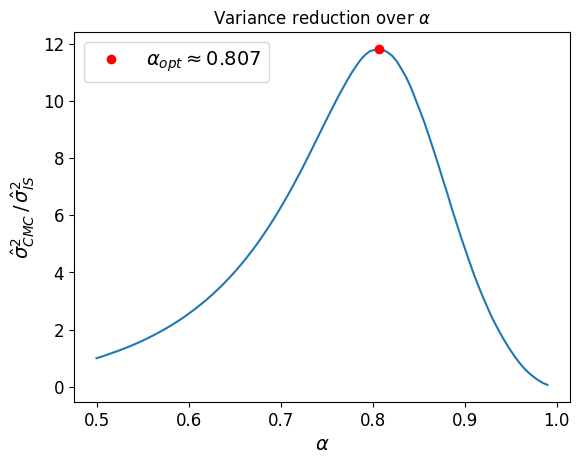

In [147]:
plt.plot(a_vals, var_ratios)
plt.plot([opt_alpha], [var_ratios.max()], "ro", label=r"$\alpha_{opt} \approx" +  f"{opt_alpha:.3f}$")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\hat{\sigma}^2_{CMC} \,/\, \hat{\sigma}^2_{IS}$")
plt.title(r"Variance reduction over $\alpha$")
plt.legend();